In [1]:
import numpy as np

In [20]:
a = np.array([0,1,2,3,20,21,22,50,51,52])
b = np.array([0, 0, 1, 2, 2.2, 5, 10, 10, 10, 10, 9, 9.9, 10, 10, 10])
c = np.nonzero(b >= 10)[0]
c

array([ 6,  7,  8,  9, 12, 13, 14])

In [6]:
for i, c in enumerate(a):
    print(c+1 != a[(i+1)%len(a)] or c-1 != a[(i-1)%len(a)], c)

True 0
False 1
False 2
True 3
True 20
False 21
True 22
True 50
False 51
True 52


In [80]:
a = np.nonzero(np.array(ddd) < 5)[0]
d = list(filter(lambda x: x[1]+1 != a[(x[0]+1)%len(a)] or x[1]-1 != a[(x[0]-1)%len(a)], enumerate(a)))
print(list(zip(*d))[1])
e = [x for i, x in enumerate(a) if (x+1 != a[(i+1)%len(a)] or x-1 != a[(i-1)%len(a)])]
ee = list(zip(e[::2],e[1::2]))
print(ee)

(0, 442, 615, 696, 698, 808, 953, 1052, 1439)
[(0, 442), (615, 696), (698, 808), (953, 1052)]


In [84]:
test1 = np.array([x for i, x in enumerate(a) if (x+1 != a[(i+1)%len(a)])])
test2 = np.array([x for i, x in enumerate(a) if (x-1 != a[(i-1)%len(a)])])
#idxs = test2[]
test3 = [x for x in test1 if x not in test2]
print(test1)
print(test2)
ttt = [x for x in zip(test2, test1) if x[0]!=x[1]]
print(ttt)

[ 442  696  698  953 1439]
[   0  615  698  808 1052]
[(0, 442), (615, 696), (808, 953), (1052, 1439)]


In [86]:
step = (2 * np.pi) / 1440
for x in ttt:
    print(x)
    print(step * x[0], step * x[1])
    print(np.rad2deg((step * x[0]-np.pi)), np.rad2deg((step * x[1]-np.pi)))

(0, 442)
0.0 1.928588823453734
-180.0 -69.5
(615, 696)
2.6834437249412817 3.036872898470133
-26.249999999999996 -6.000000000000009
(808, 953)
3.5255650890285457 4.15824694287649
22.000000000000007 58.24999999999999
(1052, 1439)
4.590215932745087 6.278821984049601
83.00000000000003 179.75000000000003


In [200]:
def range2cart(ranges, idx, theta, step):
    x = pos_x + ranges[idx] * np.cos(step * idx)
    y = pos_y + ranges[idx] * np.sin(step * idx)
    cart = np.array([x, y])
    return cart
pos_x = -5
pos_y = -6
theta = np.pi/4
oi_mat = []
aux = [1, 2, 3, 4, 5, 6, 7, 8]
idx_list = [x for t in ttt for x in t]
a = np.empty((len(idx_list), 2))
print(a.shape)
for i, x in enumerate(aux):
    a[i, :] = range2cart(aux, i, theta, np.pi/4)
print(a)
print('test')

(8, 2)
[[ -4.          -6.        ]
 [ -3.58578644  -4.58578644]
 [ -5.          -3.        ]
 [ -7.82842712  -3.17157288]
 [-10.          -6.        ]
 [ -9.24264069 -10.24264069]
 [ -5.         -13.        ]
 [  0.65685425 -11.65685425]]
test


In [202]:
print(step * (1440/2) - np.pi)
print(step * 1)
print(1440 - 720)

0.0
0.004363323129985824


In [211]:
a = np.array([0, 0])
goal = np.array([6, 7])
b = np.array([[0, 1], [-2, -1], [5, 6], [0, 2], [4.8, 7]])
print(a - b)
print(((a - b)**2))
print(np.sqrt(np.sum((a - b)**2, axis=1)))
dist_po = np.linalg.norm((a - b), axis=1)
print(dist_po)
print(np.argmin(dist_po))
dist_og = np.linalg.norm((goal - b), axis=1)
print(dist_og)
print(np.argmin(dist_og))
dist_t = dist_og + dist_po
print(dist_t)
print(np.argmin(dist_t))

[[ 0.  -1. ]
 [ 2.   1. ]
 [-5.  -6. ]
 [ 0.  -2. ]
 [-4.8 -7. ]]
[[ 0.    1.  ]
 [ 4.    1.  ]
 [25.   36.  ]
 [ 0.    4.  ]
 [23.04 49.  ]]
[1.         2.23606798 7.81024968 2.         8.48763807]
[1.         2.23606798 7.81024968 2.         8.48763807]
0
[ 8.48528137 11.3137085   1.41421356  7.81024968  1.2       ]
4
[ 9.48528137 13.54977648  9.22446324  9.81024968  9.68763807]
2


In [14]:
import numpy as np
agn2g = np.deg2rad(45)
step = (2 * np.pi) / 1440
cont_idx = [(0, 442), (615, 696), (698, 808), (953, 1052)]
for region in cont_idx:
    lim_inf = step * region[0]
    lim_sup = step * region[1]
    if lim_inf <= agn2g <= lim_sup:
        print('TRUE')
    else:
        print('false')

TRUE
false
false
false


In [24]:
theta = np.pi/2
T0r = np.array([
                [np.cos(theta), -np.sin(theta), 0, 1.5],
                [np.sin(theta), np.cos(theta), 0, -4.7],
                [0, 0, 1, 0],
                [0, 0, 0, 1]
              ])
rangex_robot = 1 * np.cos(np.pi/720 * 343 - np.pi)
rangey_robot = 1 * np.sin(np.pi/720 * 343 - np.pi)
range_robot = np.array([rangex_robot, rangey_robot, 1, 1]).reshape(-1, 1)
range_world = (T0r @ range_vec).ravel()
range_world

array([ 2.49725019, -4.77410849,  1.        ,  1.        ])

In [8]:
from random import shuffle, randrange
 
def make_maze(w = 16, h = 8):
    vis = [[0] * w + [1] for _ in range(h)] + [[1] * (w + 1)]
    ver = [["100"] * w + ['1'] for _ in range(h)] + [[]]
    hor = [["111"] * w + ['1'] for _ in range(h + 1)]
 
    def walk(x, y):
        vis[y][x] = 1
 
        d = [(x - 1, y), (x, y + 1), (x + 1, y), (x, y - 1)]
        shuffle(d)
        for (xx, yy) in d:
            if vis[yy][xx]: continue
            if xx == x: hor[max(y, yy)][x] = "100"
            if yy == y: ver[y][max(x, xx)] = "000"
            walk(xx, yy)
 
    walk(randrange(w), randrange(h))
 
    s = ""
    for (a, b) in zip(hor, ver):
        s += ''.join(a + ['\n'] + b + ['\n'])
    return s

In [49]:
from PIL import Image
import numpy as np
w = 8
s = make_maze(w, w)


value = ''.join(s.splitlines())

cmap = {'0': (255,255,255),
        '1': (0,0,0)}

carr = np.array([(255,255,255), (0,0,0)], dtype='uint8')
data = carr[np.array(list(map(int, list(value))))].reshape(3*w+1, -1, 3)
img = Image.fromarray(data, 'RGB')
img.save('./out.png', 'PNG') 

In [8]:
import numpy as np
xpos = -0.9414862476411416
ypos = 2.163412904172373
closest = 5
wstar = 0.8
x_new = 3.56772537553391
print(- xpos**2)
test = np.sqrt(-xpos**2 + 2 * xpos * x_new + wstar**2 
                                   - x_new**2 +0j)
y = ypos + np.abs(test) * np.sign(closest)
print(-xpos**2 + 2 * xpos * x_new + wstar**2 - x_new**2)                                   
print(abs(test))
print(y)

-0.8863963544973971
-19.692989462576982
4.437678386563968
6.601091290736342


In [17]:
closest_oi = np.array([-3.37852182 , 4.99485936])
pos = np.array([1.4600885968559045, 4.3440474524299])
D = np.linalg.norm(closest_oi - pos)
G = D - wstar
DyG = (-closest_oi[0] + pos[0]) / D
x_new = pos[0] - 1/(DyG) * G
print(D, G)
print(DyG)
print(x_new)
np.linalg.norm([3, 3])

4.882182596456374 4.0821825964563745
0.9910752662892831
-2.658854469638537


4.242640687119285

In [50]:
rot = np.array([
            [np.cos(np.pi/2), -np.sin(np.pi/2), 0],
            [np.sin(np.pi/2), np.cos(np.pi/2), 0],
            [0, 0, 1]
        ])
v = np.array([0, -1])
test = rot @ (np.r_[v, 0]).reshape(-1, 1)
tt = (v + test[:2].ravel())
tt[0]


1.0

In [155]:
w, v = np.linalg.eig(M)
print(w)
print(v)

[ 6.50079276e+08  1.41812423e+01  1.75833772e+04  8.04225164e+06
  2.76722976e+02 -2.02967221e-14]
[[-1.66592634e-04 -9.99493943e-01 -3.18092750e-02  1.17266960e-19
  -3.48042794e-14 -6.29488363e-15]
 [ 1.29786886e-16  8.01159882e-16 -2.51743469e-14 -1.34645881e-02
  -9.99909348e-01  1.08751771e-15]
 [-1.23711712e-02  2.24911716e-02 -7.06640716e-01  5.86710600e-18
   1.19822221e-14  7.07106781e-01]
 [-2.02819288e-17 -1.06630805e-17  3.31293011e-16 -9.99909348e-01
   1.34645881e-02 -1.69937426e-17]
 [-1.23711712e-02  2.24911716e-02 -7.06640716e-01  4.91640318e-18
   1.04484977e-14 -7.07106781e-01]
 [-9.99846929e-01 -3.90035646e-04  1.74919233e-02  2.06741874e-17
  -3.05053250e-16 -8.83859500e-19]]


In [167]:
w,v = np.linalg.eigh(M)
print(w)
print(v)

[1.60696539e-15 2.37862595e-01 9.09152326e-01 1.00402965e+01
 2.44785801e+01 6.78750564e+01]
[[-6.19943621e-17  8.49003343e-02  4.34313285e-17  5.48307757e-01
  -3.13814605e-16 -8.31955850e-01]
 [ 8.13780074e-16  2.77555756e-17 -5.50072872e-01 -1.11022302e-16
  -8.35116660e-01  2.22044605e-16]
 [ 7.07106781e-01 -3.82819869e-01  7.77156117e-16 -4.77705148e-01
   3.33066907e-16 -3.53902161e-01]
 [-1.22608432e-15 -1.44099219e-16  8.35116660e-01 -1.74695598e-16
  -5.50072872e-01  1.21244540e-16]
 [-7.07106781e-01 -3.82819869e-01 -8.32667268e-16 -4.77705148e-01
   2.22044605e-16 -3.53902161e-01]
 [-6.14972744e-16  8.36474643e-01  1.94289029e-16 -4.92903831e-01
   1.11022302e-16 -2.39491095e-01]]


In [359]:
def curve_approx(coords, lims, N_points = 1000):
    """Approximates a curve by lienar regression as
    a0 + a1xi + a2xi^2 + a3xiyi + a4yi +a5yi^2 = 0.

    Params
    ------
    coords: np.array
        A matrix of object coordinates as matrix rows, i.e.
        [[x0, y0], [x1, y1],..., [xn, yn]].
    lims: tuple
        The interval [inf, sup] for which the approximation is desired.
    N_points: int
        Number of points to approximate. Default == 1000.
        
    """
    M = np.zeros((6,6))
    coord_std = np.std(coords, axis=0)
    coord_mean = np.mean(coords, axis=0)
    coords = (coords - coord_mean) / coord_std

    for coord in coords:
        xi, yi = coord
        r = np.array([1, xi, xi**2, xi*yi, yi, yi**2]).reshape(-1, 1)
        M = M + r @ r.T
        
    w, v = np.linalg.eigh(M)
    a = v[:, 0].reshape(-1, 1)

    A = np.array([
                    [a[2], a[3] / 2], 
                    [a[3] / 2, a[5]]
                ]).reshape(2,2)
    D, Q = np.linalg.eigh(A)
    b = np.array([a[1], a[4]]).reshape(-1, 1)
    c_list = []

    if np.linalg.det(A) >= 1e-3:
        # c0 + c1*ẍ^2 + c2*ÿ^2=0
        print('elipse')
        c0 = float(a[0]- (b.T @ np.linalg.inv(A) @ b)/ 4)
        c1, c2 = D
        c_list.append([c0,c1,c2])
        rx = np.sqrt(-c0 / c1) 
        ry = np.sqrt(-c0 / c2)
        theta_ = np.linspace(lims[0], lims[1], N_points)
        p_ = np.array([rx, ry]).reshape(-1,1) * [np.cos(theta_), np.sin(theta_)]
        p = Q @ p_ - (np.linalg.inv(A) @ b / 2)

    elif np.linalg.det(A) <= -1e-3:
        print('hiperbole')
        c0 = float(a[0] - (b.T @ np.linalg.inv(A) @ b)/ 4)
        c1, c2 = D
        c_list.append([c0,c1,c2])
        psi = np.linspace(lims[0], lims[1], N_points)
        if c0 / c1 > 0:
            rx = np.sqrt(c0 / c1)
            ry = np.sqrt(-c0 / c2)
            x = rx * np.sinh(psi)
            y = ry * np.cosh(psi)
        else:
            rx = np.sqrt(-c0 / c1)
            ry = np.sqrt(c0 / c2)
            x = rx * np.cosh(psi)
            y = ry * np.sinh(psi)
        x = np.r_[-x, x]
        y = np.r_[-y, y]
        p_ = np.array([x, y])
        p = Q @ p_ - (np.linalg.inv(A) @ b / 2)

    else:
        # c0+c1*ẍ + c2*ÿ + c3*ẍ^2 + c4*ÿ^2 =0
        print('parabola')
        c0 = float(a[0])
        aux = (b.T @ Q).ravel()
        c1, c2 = aux
        c3, c4 = D
        c_list.append([c0,c1,c2, c3, c4])

        if np.abs(D[0]) < np.abs(D[1]):
            print('x')
            y = np.linspace(lims[0], lims[1], N_points)
            x = -c0/c1 - c2/c1 * y -c4/c1 * y**2
        else:
            print('y')
            x = np.linspace(lims[0], lims[1], N_points)
            y = -c0/c2 - c1/c2 * x -c3/c2 * x**2
        p_ = np.array([x, y])
        p = Q @ p_
    
    p = p * (coord_std).reshape(-1, 1) + coord_mean.reshape(-1, 1)

    return p.T, (w, v, a, A, D, Q, c_list)
    

In [365]:
theta = np.linspace(-5, 5, 1000)
x0 = theta
y0 = x0 ** 2 + 0.3*np.random.default_rng().normal(size=x0.shape)
r = np.c_[x0, y0]
p, check = curve_approx(r, (-2, 2))

fig = go.Figure(go.Scatter(x=r[:,0].ravel(), y=r[:,1].ravel()))
fig.add_trace(go.Scatter(x=p[:, 0].ravel(), y=p[:, 1].ravel()))
fig.show()

parabola
x


In [371]:
np.unique(np.linspace(541, 670, (670-541)//2+1, dtype=int))

array([541, 543, 545, 547, 549, 551, 553, 555, 557, 559, 561, 563, 565,
       567, 569, 571, 573, 575, 577, 579, 581, 583, 585, 587, 589, 591,
       593, 595, 597, 599, 601, 603, 605, 607, 609, 611, 613, 615, 617,
       619, 621, 623, 625, 627, 629, 631, 633, 635, 637, 639, 641, 643,
       645, 647, 649, 651, 653, 655, 657, 659, 661, 663, 665, 667, 670])

In [370]:
np.unique(np.linspace(1, 10, 20, dtype=int))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [342]:
np.array([[1, 1, 2, 4, 5], [2, 2, 4, 8, 10]]) - np.array([1, 2]).reshape(-1, 1)

array([[0, 0, 1, 3, 4],
       [0, 0, 2, 6, 8]])

In [378]:
p

array([[ 5.76640946, 33.3885808 ],
       [ 5.75490811, 33.25474544],
       [ 5.74340661, 33.12117859],
       ...,
       [-5.76895847, 33.27145738],
       [-5.78059741, 33.4053263 ],
       [-5.79223649, 33.53946373]])

In [401]:
a = np.array([-1, 2])
r = np.array([1, 0])
wstar = 0.5
vec = a - r
b = (np.abs(a) - 0.8) * np.sign(a)
b


array([-0.2,  1.2])

In [99]:
import numpy as np
from scipy.optimize import fsolve
import plotly.graph_objects as go
# a0 + a1xi + a2xi^2 + a3xiyi + a4yi +a5yi^2
theta = np.linspace(-5, 5, 1000)
#theta = np.linspace(0, np.pi, 1000)
#x0 = theta
#y0 = x0 ** 2 + 0.8*np.random.default_rng().normal(size=x0.shape)
#x0 = 2*np.cosh(theta) + 0.5*np.sinh(theta) + 3
x0 = 3*np.ones(theta.shape)
y0 = theta
#y0 = -0.5*np.sinh(theta) + 4*np.cosh(theta) + 3
c = np.sqrt(2)/2
aux  = np.array([[c, -c], [c, c]]) @ np.r_[[x0], [y0]].reshape(2,-1)
#x0 = aux[0,:]
#y0 = aux[1,:]
r = np.c_[x0, y0]
#r = np.random.rand(6,2)
M = np.zeros((6,6))
#print(r)
for k, i in enumerate(r):
    xi, yi = i
    rr = np.array([1, xi, xi**2, xi*yi, yi, yi**2]).reshape(-1, 1)
    # print(rr)
    #print(rr.T.shape)
    M = M + rr @ rr.T
w, v = np.linalg.eigh(M)
#idx = np.argmin(w)
a = v[:, 0].reshape(-1, 1)
xs = np.linspace(0, 10, 1000)
y = []
A = np.array([[float(a[2]), float(a[3]/2)], [float(a[3]/2), float(a[5])]])
D, Q = np.linalg.eigh(A)
b = np.array([a[1], a[4]]).reshape(-1, 1)

if np.linalg.det(A) >= 1e-3:
    print('elipse')
    # c0 + c1*ẍ^2 + c2*ÿ^2=0
    c0 = float(float(a[0]) - (b.T @ np.linalg.inv(A) @ b)/ 4)
    c1 = D[0]
    c2 = D[1]
    rx = np.sqrt(-c0/c1)
    ry = np.sqrt(-c0/c2)
    theta = np.linspace(0, 2*np.pi, 1000)
    p_ = np.array([rx, ry]).reshape(-1,1) * [np.cos(theta), np.sin(theta)]
    p = Q @ p_ - (np.linalg.inv(A) @ b / 2)
elif np.linalg.det(A) <= -1e-3:
    print('hiperbole')
    c0 = float(float(a[0]) - (b.T @ np.linalg.inv(A) @ b)/ 4)
    c1 = D[0]
    c2 = D[1]
    psi = np.linspace(-1, 1, 1000)
    if c0 / c1 > 0:
        rx = np.sqrt(c0/c1)
        ry = np.sqrt(-c0/c2)
        x = rx*np.sinh(psi)
        y = ry*np.cosh(psi)
    else:
        rx = np.sqrt(-c0/c1)
        ry = np.sqrt(c0/c2)
        x = rx*np.cosh(psi)
        y = ry*np.sinh(psi)
    x = np.r_[-x, x]
    y = np.r_[-y, y]
    p_ = np.array([x, y])
    p = Q @ p_ - (np.linalg.inv(A) @ b / 2)
else:
    # c0+c1*ẍ + c2*ÿ + c3*ẍ^2 + c4*ÿ^2 =0
    print('parabola')
    c0 = float(a[0])
    aux = (b.T @ Q).ravel()
    c1 = aux[0]
    c2 = aux[1]
    c3 = D[0]
    c4 = D[1]
    if np.abs(D[0]) < np.abs(D[1]):
        y = np.linspace(-10, 10, 1000)
        x = - c0/c1 - c2/c1 * y -c4/c1 * y**2
    else: 
        x = np.linspace(-10, 10, 1000)
        y = - c0/c2 - c1/c2 * x -c3/c2 * x**2
    p_ = np.array([x, y])
    p = Q @ p_
#for xa in xs:
#    x = float(xa)
#    rot = fsolve(lambda y: float(a.T @ np.array([1, x, x**2, x*y[0], y[0], y[0]**2]).reshape(-1, 1)), [1])
#    y.append(float(rot))

fig = go.Figure(go.Scatter(x=r[:,0].ravel(), y=r[:,1].ravel(), name='original', opacity=0.7))
fig.add_trace(go.Scatter(x=p[0], y=p[1], name='curva aproximada'))
fig.show()

hiperbole


In [117]:
def approximate_boundary(coords, lims, N_points = 1000):
    """Approximates a curve by linear regression as
    a0 + a1xi + a2xi^2 + a3xiyi + a4yi +a5yi^2 = 0, using sampled
    coordinates.

    Params
    ------
    coords: np.array
        A matrix of object coordinates as matrix rows, i.e.
        [[x0, y0], [x1, y1],..., [xn, yn]].
    lims: tuple
        The interval [inf, sup] for which the approximation is desired.
    N_points: int
        Number of points to approximate. Default == 1000.

    Returns
    -------
    p: np.array
        A matrix with each approximated coordinate as matrix rows. 
        (See <coords>)
        
    """
    M = np.zeros((6,6))
    coord_std = np.std(coords, axis=0)
    if np.count_nonzero(coord_std) != 2:
        idx = np.nonzero(coord_std == 0)
        coord_std[idx] = 1
    coord_mean = np.mean(coords, axis=0)
    #coords = (coords - coord_mean) / coord_std

    for coord in coords:
        xi, yi = coord
        r = np.array([1, xi, xi**2, xi*yi, yi, yi**2]).reshape(-1, 1)
        M = M + r @ r.T
    print(coord_std)
    w, v = np.linalg.eigh(M)
    a = v[:, 0].reshape(-1, 1)

    A = np.array([
                    [a[2], a[3] / 2], 
                    [a[3] / 2, a[5]]
                ]).reshape(2,2)
    D, Q = np.linalg.eigh(A)
    b = np.array([a[1], a[4]]).reshape(-1, 1)
    c_list = []

    if np.linalg.det(A) >= 1e-3:
        # c0 + c1*ẍ^2 + c2*ÿ^2=0
        c0 = float(a[0]- (b.T @ np.linalg.inv(A) @ b)/ 4)
        c1, c2 = D
        c_list.append([c0,c1,c2])
        rx = np.sqrt(-c0 / c1) 
        ry = np.sqrt(-c0 / c2)
        theta_ = np.linspace(0, 2*np.pi, N_points)
        p_ = np.array([rx, ry]).reshape(-1,1) * [np.cos(theta_), np.sin(theta_)]
        p = Q @ p_ - (np.linalg.inv(A) @ b / 2)

    elif np.linalg.det(A) <= -1e-3:
        c0 = float(a[0] - (b.T @ np.linalg.inv(A) @ b)/ 4)
        c1, c2 = D
        c_list.append([c0,c1,c2])
        psi = np.linspace(-20, 20, N_points)
        if c0 / c1 > 0:
            rx = np.sqrt(c0 / c1)
            ry = np.sqrt(-c0 / c2)
            x = rx * np.sinh(psi)
            y = ry * np.cosh(psi)
        else:
            rx = np.sqrt(-c0 / c1)
            ry = np.sqrt(c0 / c2)
            x = rx * np.cosh(psi)
            y = ry * np.sinh(psi)
        x = np.r_[-x, x]
        y = np.r_[-y, y]
        p_ = np.array([x, y])
        p = Q @ p_ - (np.linalg.inv(A) @ b / 2)

    else:
        # c0+c1*ẍ + c2*ÿ + c3*ẍ^2 + c4*ÿ^2 =0
        c0 = float(a[0])
        aux = (b.T @ Q).ravel()
        c1, c2 = aux
        c3, c4 = D
        c_list.append([c0,c1,c2, c3, c4])
        t_ = np.linspace(-20, 20, N_points)

        if np.abs(D[0]) < np.abs(D[1]):
            y = t_
            x = -c0/c1 - c2/c1 * y -c4/c1 * y**2
        else: 
            x = t_
            y = -c0/c2 - c1/c2 * x -c3/c2 * x**2
        p_ = np.array([x, y])
        p = Q @ p_
    print(p.shape, coord_std.shape, coord_mean.shape)
    #p = p * (coord_std).reshape(-1, 1) + coord_mean.reshape(-1, 1)

    return p.T, (w, v, a, A, D, Q, c_list)

In [72]:
coord_std = np.array([0, 3])
if np.count_nonzero(coord_std) != 2:
    idx = np.nonzero(coord_std == 0)
    coord_std[idx] = 1
coord_std

array([1, 3])

In [111]:
a = np.array([[1,1,1,1,1,2],[3,2,2,2,2,2]])
st = np.array([[1],[2]])
print(a.shape, st.shape)
a * st

(2, 6) (2, 1)


array([[1, 1, 1, 1, 1, 2],
       [6, 4, 4, 4, 4, 4]])

In [118]:
theta = np.linspace(-5, 5, 1000)
x0 = 3*np.ones(theta.shape)
y0 = theta
#c = np.sqrt(2)/2
#aux  = np.array([[c, -c], [c, c]]) @ np.r_[[x0], [y0]].reshape(2,-1)
#x0 = aux[0,:]
#y0 = aux[1,:]
r = np.c_[x0, y0]
p, _ = approximate_boundary(r, (-100, 100))
coord_std = np.std(r, axis=0)
if np.count_nonzero(coord_std) != 2:
    idx = np.nonzero(coord_std == 0)
    coord_std[idx] = 1
coord_mean = np.mean(r, axis=0)
coords = (r - coord_mean) / coord_std
fig = go.Figure(go.Scatter(x=r[:,0].ravel(), y=r[:,1].ravel(), name='original', opacity=0.9))
fig.add_trace(go.Scatter(x=p[:, 0].ravel(), y=p[:, 1].ravel(), name='curva aproximada', opacity=0.9))
fig.add_trace(go.Scatter(x=coords[:, 0].ravel(), y=coords[:, 1].ravel(), name='original normalizado', opacity=0.9))
fig.update_xaxes(range=[0, 6])
fig.update_yaxes(range=[-6, 6])
fig.show()

[1.         2.88963954]
(2, 2000) (2,) (2,)


In [78]:
p

array([[-1.70000000e+01, -4.68870822e+33],
       [-1.69599600e+01, -4.67932142e+33],
       [-1.69199199e+01, -4.66993462e+33],
       ...,
       [ 2.29199199e+01,  4.66993462e+33],
       [ 2.29599600e+01,  4.67932142e+33],
       [ 2.30000000e+01,  4.68870822e+33]])

In [ ]:
#2.89655370e2

In [130]:
f = lambda x: float((a.T @ (np.array([1, x[0], x[0]**2, x[0]*x[1], x[1], x[1]**2]).reshape(-1, 1) @ np.array([1, x[0], x[0]**2, x[0]*x[1], x[1], x[1]**2]).reshape(1, -1)) @ a).ravel())
f([1,1])

1.0639299704711145

In [40]:
import pandas as pd
import numpy as np
import plotly.express as px

#x = np.arange(1, 101).reshape(-1, 1)
#y = np.linspace(100, 120, 100).reshape(-1,1)
#p = np.array([x, y]).
#print(p.shape)
df = pd.read_csv('./catkin_ws/src/tangent_bug/debug.csv', index_col=0)
df2 = pd.read_csv('./catkin_ws/src/tangent_bug/debugmat.csv', index_col=0)
fig = px.scatter(df, x='0', y='1', opacity=0.4)
fig.add_scatter(x=df2['0'], y=df2['1'], mode='markers', name='observado', opacity=0.9)
fig.update_xaxes(range=[df2.min()['0'], df2.max()['0']*1.2])
fig.update_yaxes(range=[df2.min()['1']*0.2, df2.max()['1']*1.2])
fig.show()

In [19]:
fig.add_scatter(x=(df2['0'] - df2['0'].mean())/df2['0'].std(), y=(df2['1'] - df2['1'].mean()/df2['1'].std()), mode='markers', name='norm', opacity=0.9)
fig.show()

In [6]:
fig.add_scatter(x=-df['0'], y=-df['1'], mode='markers', name='-hiperb', opacity=0.9)
fig.show()

In [101]:
df2['0'].min()

-5.025969171967363

In [48]:
all(np.sign([-3 ,3]) != np.sign([3, -3]))

True

In [107]:
a = np.array([[1, 3], [0, 2], [4, 1]])
np.max(a[:, 0])

4

In [17]:
laser_range_max = 5.0
ranges = np.array([5, 4.9, 4, 5, 5])
cont_indx = np.nonzero(np.array(ranges) < laser_range_max)[0]
# Get superior and inferior limits of continuities
lim_sup = np.array([x for i, x in enumerate(cont_indx) 
                    if (x + 1 != cont_indx[(i + 1) % len(cont_indx)])])
lim_inf = np.array([x for i, x in enumerate(cont_indx) 
                    if (x - 1 != cont_indx[(i - 1) % len(cont_indx)])])
cont_lims = [x for x in zip(lim_inf, lim_sup) if x[0] != x[1]]
not cont_lims

False

In [45]:
tangent = np.array([-1, 0])
new_tangent = tangent.copy()
c1, c2, s1, s2 = (-1, 1, -1, -1)
rot180 = np.array([
                [np.cos(np.pi), -np.sin(np.pi)],
                [np.sin(np.pi), np.cos(np.pi)]
             ])
if c1 != c2 or s1 != s2:
    new_tangent = (rot180 @ tangent.reshape(-1, 1)).ravel()
new_tangent

array([ 1.0000000e+00, -1.2246468e-16])

In [62]:
lim_inf, lim_sup = (349, 350)
-(-(lim_sup - lim_inf) // 2) + 1

2

In [95]:
ranges_test = [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 1.9867613315582275, 1.983113408088684, 1.979516625404358, 2.0, 1.972474455833435, 2.0, 1.9656316041946411, 1.962283968925476, 1.9589849710464478, 1.9557342529296875, 1.9525315761566162, 1.9493763446807861, 1.9462684392929077, 1.9432072639465332, 1.9401928186416626, 1.9372245073318481, 1.9343020915985107, 1.9314252138137817, 1.928593635559082, 1.925806999206543, 1.923064947128296, 1.9203673601150513, 1.9177137613296509, 1.9151040315628052, 1.912537693977356, 1.9100146293640137, 1.9075345993041992, 1.905097246170044, 1.9027023315429688, 1.9003496170043945, 1.8980388641357422, 1.895769715309143, 1.8935421705245972, 1.8913558721542358, 1.88921058177948, 1.8871060609817505, 1.8850420713424683, 1.893837571144104, 1.8918427228927612, 1.8898881673812866, 1.8879735469818115, 1.8860987424850464, 1.884263515472412, 1.8824677467346191, 1.8807111978530884, 1.8789937496185303, 1.8773151636123657, 1.8756753206253052, 1.874074101448059, 1.8725111484527588, 1.8709864616394043, 1.869499921798706, 1.8680514097213745, 1.866640567779541, 1.8652673959732056, 1.8639317750930786, 1.8626335859298706, 1.8613725900650024, 1.8601487874984741, 1.858962059020996, 1.8578121662139893, 1.8566991090774536, 1.8556227684020996, 1.8545829057693481, 1.8535796403884888, 1.8526127338409424, 1.8516820669174194, 1.85078763961792, 1.8499293327331543, 1.849107027053833, 1.848320722579956, 1.8475703001022339, 1.846855640411377, 1.8461767435073853, 1.8455334901809692, 1.844925880432129, 1.8443537950515747, 1.8438172340393066, 1.8433160781860352, 1.8428503274917603, 1.842419981956482, 1.8420249223709106, 1.8416650295257568, 1.8413405418395996, 1.8410512208938599, 1.840796947479248, 1.8405779600143433, 1.840394139289856, 1.8402453660964966, 1.8401316404342651, 1.8400530815124512, 1.8400095701217651, 1.8400012254714966, 1.8400278091430664, 1.8400896787643433, 1.8401864767074585, 1.8403184413909912, 1.8404854536056519, 1.84068763256073, 1.8409249782562256, 1.8411974906921387, 1.8415051698684692, 1.8418480157852173, 1.842226266860962, 1.842639684677124, 1.8430885076522827, 1.8435726165771484, 1.8440922498703003, 1.8446472883224487, 1.8452378511428833, 1.8458640575408936, 1.8465259075164795, 1.8472234010696411, 1.847956657409668, 1.8487257957458496, 1.849530816078186, 1.8503718376159668, 1.7103930711746216, 1.711236834526062, 1.7121140956878662, 1.5719523429870605, 1.5728191137313843, 1.4526616334915161, 1.4535189867019653, 1.3534046411514282, 1.334043264389038, 1.3349084854125977, 1.254842758178711, 1.2557055950164795, 1.175523042678833, 1.176377296447754, 1.1163628101348877, 1.117218017578125, 1.118095874786377, 1.0579602718353271, 1.0588332414627075, 0.9985897541046143, 0.9994533061981201, 0.9390922784805298, 0.9399417042732239, 0.9408105611801147, 0.9007556438446045, 0.9016242623329163, 0.8614885807037354, 0.8623539209365845, 0.8221309185028076, 0.822989821434021, 0.8238662481307983, 0.7835223078727722, 0.7843884825706482, 0.7439414262771606, 0.7447941303253174, 0.7249501347541809, 0.725810706615448, 0.7266871929168701, 0.7067916989326477, 0.7076743245124817, 0.6668919920921326, 0.6677523851394653, 0.6686277985572815, 0.6485958099365234, 0.6494731903076172, 0.6293858289718628, 0.63026362657547, 0.6101173758506775, 0.6109939813613892, 0.6118848323822021, 0.5916593074798584, 0.5925471782684326, 0.5722544193267822, 0.573137640953064, 0.574034571647644, 0.5536510348320007, 0.5545413494110107, 0.5340819358825684, 0.5349640846252441, 0.5358593463897705, 0.5367678999900818, 0.5161821842193604, 0.5170801281929016, 0.5179910659790039, 0.5189151167869568, 0.4981919229030609, 0.49910295009613037, 0.47828659415245056, 0.47918277978897095, 0.48009151220321655, 0.48101288080215454, 0.4819469749927521, 0.4609442353248596, 0.4618605375289917, 0.4627893567085266, 0.44164833426475525, 0.4425570070743561, 0.44347792863845825, 0.44441115856170654, 0.4453568458557129, 0.4239993095397949, 0.4249216914176941, 0.42585623264312744, 0.42680302262306213, 0.4277622401714325, 0.40616899728775024, 0.4071015417575836, 0.408046156167984, 0.40900301933288574, 0.4099721908569336, 0.3881230354309082, 0.3890620172023773, 0.3900130093097687, 0.39097610116004944, 0.3919515013694763, 0.36982518434524536, 0.37076660990715027, 0.37171998620033264, 0.37268537282943726, 0.37366291880607605, 0.37465280294418335, 0.37565508484840393, 0.3531281054019928, 0.35409149527549744, 0.3550669252872467, 0.35605454444885254, 0.3570545017719269, 0.35806694626808167, 0.35909202694892883, 0.33612120151519775, 0.33710190653800964, 0.3380948305130005, 0.33910009264945984, 0.340117871761322, 0.3411482870578766, 0.3177492618560791, 0.3187299966812134, 0.3197229206562042, 0.32072821259498596, 0.32174596190452576, 0.3227763772010803, 0.323819637298584, 0.3248758316040039, 0.3259451985359192, 0.3270278871059418, 0.30288374423980713, 0.30390819907188416, 0.3049454689025879, 0.3059956729412079, 0.30705904960632324, 0.3081356883049011, 0.309225857257843, 0.3103296756744385, 0.3114473819732666, 0.28653088212013245, 0.2875814139842987, 0.2886451780796051, 0.28972238302230835, 0.29081323742866516, 0.29191792011260986, 0.29303663969039917, 0.2941696047782898, 0.29531699419021606, 0.2695264220237732, 0.27059635519981384, 0.2716800272464752, 0.27277764678001404, 0.2738893926143646, 0.2750155031681061, 0.2761562168598175, 0.2773117423057556, 0.2784822881221771, 0.2796681225299835, 0.2808694839477539, 0.2836049199104309, 0.2823680639266968, 0.281147301197052, 0.2799423336982727, 0.2787529528141022, 0.2775789201259613, 0.2764199674129486, 0.2752758860588074, 0.2741464376449585, 0.27303141355514526, 0.2719305753707886, 0.2708437144756317, 0.26977065205574036, 0.2687111496925354, 0.26766499876976013, 0.2666320502758026, 0.26561209559440613, 0.26460492610931396, 0.2636103630065918, 0.2626282572746277, 0.2616584002971649, 0.26070064306259155, 0.25975480675697327, 0.25882071256637573, 0.257898211479187, 0.25698715448379517, 0.25608736276626587, 0.25519871711730957, 0.25432103872299194, 0.25345417857170105, 0.25259801745414734, 0.25175240635871887, 0.2509172260761261, 0.2500922977924347, 0.2492775022983551, 0.24847273528575897, 0.24767786264419556, 0.24689273536205292, 0.2461172640323639, 0.24535129964351654, 0.2445947378873825, 0.24384747445583344, 0.24310937523841858, 0.24238033592700958, 0.2416602373123169, 0.24094900488853455, 0.2402465045452118, 0.23955264687538147, 0.23886732757091522, 0.2381904423236847, 0.23752188682556152, 0.23686157166957855, 0.2362094223499298, 0.23556531965732574, 0.23492920398712158, 0.23430095613002777, 0.23368050158023834, 0.23306776583194733, 0.23246264457702637, 0.2318650782108307, 0.23127497732639313, 0.23069223761558533, 0.2301168292760849, 0.2295486330986023, 0.22898758947849274, 0.22843363881111145, 0.22788669168949127, 0.22734667360782623, 0.22681352496147156, 0.22628718614578247, 0.2257675677537918, 0.2252546101808548, 0.22474826872348785, 0.22424845397472382, 0.2237551212310791, 0.22326819598674774, 0.22278763353824615, 0.22231334447860718, 0.22184531390666962, 0.2213834524154663, 0.22092770040035248, 0.22047802805900574, 0.2200343757867813, 0.21959666907787323, 0.2191648781299591, 0.21873894333839417, 0.21831881999969482, 0.2179044485092163, 0.21749578416347504, 0.21709278225898743, 0.2166953980922699, 0.21630358695983887, 0.21591728925704956, 0.2155364751815796, 0.21516110002994537, 0.21479110419750214, 0.21442647278308868, 0.21406714618206024, 0.21371309459209442, 0.21336427330970764, 0.21302063763141632, 0.21268215775489807, 0.2123488038778305, 0.21202051639556885, 0.2116972804069519, 0.2113790512084961, 0.21106578409671783, 0.21075746417045593, 0.2104540467262268, 0.21015551686286926, 0.20986181497573853, 0.2095729261636734, 0.2092888206243515, 0.20900945365428925, 0.20873481035232544, 0.2084648609161377, 0.20819956064224243, 0.20793890953063965, 0.20768286287784576, 0.2074313908815384, 0.20718447864055634, 0.20694208145141602, 0.20670419931411743, 0.206470787525177, 0.20624183118343353, 0.20601731538772583, 0.2057971954345703, 0.2055814564228058, 0.20537009835243225, 0.20516307651996613, 0.20496036112308502, 0.20476196706295013, 0.2045678347349167, 0.20437796413898468, 0.2041923552751541, 0.2040109485387802, 0.20383375883102417, 0.2036607414484024, 0.2034919112920761, 0.2033272236585617, 0.2031666785478592, 0.20301024615764618, 0.20285792648792267, 0.20270968973636627, 0.202565535902977, 0.20242543518543243, 0.2022893875837326, 0.2021573781967163, 0.20202939212322235, 0.20190539956092834, 0.20178541541099548, 0.20166942477226257, 0.20155739784240723, 0.20144931972026825, 0.20134522020816803, 0.2012450397014618, 0.20114880800247192, 0.20105649530887604, 0.20096810162067413, 0.20088361203670502, 0.2008030116558075, 0.20072630047798157, 0.20065347850322723, 0.2005845457315445, 0.20051945745944977, 0.20045824348926544, 0.20040088891983032, 0.20034737884998322, 0.20029772818088531, 0.20025190711021423, 0.20020993053913116, 0.20017176866531372, 0.2001374512910843, 0.20010696351528168, 0.2000802904367447, 0.20005744695663452, 0.20003841817378998, 0.20002320408821106, 0.20001180469989777, 0.2000042200088501, 0.20000045001506805, 0.20000049471855164, 0.20000435411930084, 0.20001202821731567, 0.20002351701259613, 0.20003880560398102, 0.20005792379379272, 0.20008085668087006, 0.2001076191663742, 0.20013819634914398, 0.20017260313034058, 0.200210839509964, 0.20025290548801422, 0.20029881596565247, 0.20034855604171753, 0.2004021555185318, 0.20045959949493408, 0.20052090287208557, 0.20058606564998627, 0.20065510272979736, 0.20072801411151886, 0.20080479979515076, 0.20088548958301544, 0.20097006857395172, 0.2010585516691208, 0.20115095376968384, 0.20124728977680206, 0.20134754478931427, 0.20145174860954285, 0.2015599012374878, 0.2016720175743103, 0.20178811252117157, 0.2019081860780716, 0.20203225314617157, 0.20216034352779388, 0.20229244232177734, 0.20242857933044434, 0.20256876945495605, 0.2027130275964737, 0.20286135375499725, 0.20301376283168793, 0.2031702846288681, 0.20333093404769897, 0.20349571108818054, 0.2036646455526352, 0.20383775234222412, 0.20401503145694733, 0.2041965276002884, 0.2043822556734085, 0.20457221567630768, 0.2047664374113083, 0.20496493577957153, 0.2051677405834198, 0.20537486672401428, 0.20558632910251617, 0.20580215752124786, 0.20602238178253174, 0.2062470018863678, 0.20647606253623962, 0.20670956373214722, 0.20694755017757416, 0.20719005167484283, 0.20743706822395325, 0.20768864452838898, 0.20794479548931122, 0.20820556581020355, 0.20847095549106598, 0.20874102413654327, 0.20901577174663544, 0.20929524302482605, 0.2095794528722763, 0.2098684459924698, 0.21016226708889008, 0.21046091616153717, 0.21076443791389465, 0.2110728621482849, 0.21138624846935272, 0.2117045819759369, 0.21202793717384338, 0.2123563438653946, 0.2126898169517517, 0.2130284160375595, 0.21337217092514038, 0.2137211114168167, 0.21407528221607208, 0.21443472802639008, 0.21479947865009308, 0.21516959369182587, 0.21554508805274963, 0.21592603623867035, 0.2163124531507492, 0.21670439839363098, 0.21710191667079926, 0.21750503778457642, 0.21791383624076843, 0.2183283269405365, 0.21874858438968658, 0.21917465329170227, 0.21960657835006714, 0.22004441916942596, 0.22048822045326233, 0.22093802690505981, 0.2213938981294632, 0.22185590863227844, 0.22232408821582794, 0.22279851138591766, 0.2232792228460312, 0.2237662971019745, 0.22425977885723114, 0.22475972771644592, 0.225266233086586, 0.22577933967113495, 0.22629910707473755, 0.22682559490203857, 0.22735890746116638, 0.22789907455444336, 0.22844618558883667, 0.2290003001689911, 0.22956149280071259, 0.23012985289096832, 0.23070544004440308, 0.23128832876682281, 0.2318786084651947, 0.2324763536453247, 0.2330816388130188, 0.23369455337524414, 0.2343151867389679, 0.23494361340999603, 0.23557992279529572, 0.2362241894006729, 0.23687653243541718, 0.23753702640533447, 0.23820577561855316, 0.2388828545808792, 0.23956838250160217, 0.2402624487876892, 0.24096515774726868, 0.24167659878730774, 0.24239690601825714, 0.24312615394592285, 0.24386447668075562, 0.2446119785308838, 0.24536874890327454, 0.246134951710701, 0.24691066145896912, 0.24769601225852966, 0.24849112331867218, 0.2492961287498474, 0.2501111626625061, 0.2509363293647766, 0.2517717778682709, 0.25261762738227844, 0.25347405672073364, 0.25434115529060364, 0.25521910190582275, 0.25610801577568054, 0.25700807571411133, 0.25791940093040466, 0.25884220004081726, 0.2597765624523163, 0.26072269678115845, 0.2616807520389557, 0.26265090703964233, 0.2636333107948303, 0.26462817192077637, 0.2656356394290924, 0.26665592193603516, 0.26768919825553894, 0.2687356472015381, 0.2697954773902893, 0.2708688974380493, 0.27195608615875244, 0.2730572521686554, 0.2741726338863373, 0.2753024399280548, 0.2764468789100647, 0.27760621905326843, 0.27878060936927795, 0.2799703776836395, 0.2811757028102875, 0.2823968827724457, 0.28363412618637085, 0.2808411121368408, 0.2796401083469391, 0.27845460176467896, 0.2772843837738037, 0.27612921595573425, 0.2749888300895691, 0.2738630473613739, 0.2727515995502472, 0.27165430784225464, 0.2705709636211395, 0.26950132846832275, 0.2952897250652313, 0.29414263367652893, 0.29301002621650696, 0.2918916344642639, 0.2907872498035431, 0.28969672322273254, 0.2886198163032532, 0.28755632042884827, 0.28650611639022827, 0.3114206790924072, 0.31030330061912537, 0.3091997802257538, 0.30810993909835815, 0.30703356862068176, 0.30597051978111267, 0.30492061376571655, 0.3038836419582367, 0.32809773087501526, 0.3270018696784973, 0.325919508934021, 0.3248504400253296, 0.32379454374313354, 0.32275158166885376, 0.32172146439552307, 0.32070398330688477, 0.3196989893913269, 0.31870633363723755, 0.31772586703300476, 0.34112340211868286, 0.3400932848453522, 0.33907580375671387, 0.338070809841156, 0.33707818388938904, 0.33609774708747864, 0.3590672016143799, 0.3580424189567566, 0.3570302426815033, 0.35603058338165283, 0.3550432324409485, 0.3540680706501007, 0.35310497879981995, 0.3756307065486908, 0.3746286928653717, 0.3736391067504883, 0.372661828994751, 0.37169674038887024, 0.37074366211891174, 0.36980247497558594, 0.39192765951156616, 0.39095258712768555, 0.3899897336959839, 0.3890390396118164, 0.38810035586357117, 0.4099484384059906, 0.4089795649051666, 0.40802302956581116, 0.40707868337631226, 0.40614643692970276, 0.4277386963367462, 0.4267798066139221, 0.4258332848548889, 0.42489904165267944, 0.42397695779800415, 0.4453336000442505, 0.444388210773468, 0.4434552788734436, 0.4425346851348877, 0.44162628054618835, 0.46276649832725525, 0.4618379771709442, 0.460921972990036, 0.4819239675998688, 0.4809901714324951, 0.480069100856781, 0.47916069626808167, 0.47826480865478516, 0.49908050894737244, 0.49816974997520447, 0.5188923478126526, 0.5179685354232788, 0.5170578956604004, 0.5161603093147278, 0.5367454290390015, 0.5358372330665588, 0.5349422693252563, 0.5340604186058044, 0.5545193552970886, 0.5536292791366577, 0.5740123391151428, 0.5731157660484314, 0.5722328424453735, 0.5925251841545105, 0.5916376709938049, 0.6118627786636353, 0.6109722256660461, 0.6100959181785583, 0.6302418112754822, 0.6293643712997437, 0.6494513750076294, 0.6485744118690491, 0.6686060428619385, 0.667730987071991, 0.6668709516525269, 0.7076523900032043, 0.706770122051239, 0.7266653776168823, 0.7257892489433289, 0.7456413507461548, 0.7447728514671326, 0.7439205646514893, 0.7843668460845947, 0.7835010886192322, 0.8238443732261658, 0.8229683637619019, 0.8221098780632019, 0.862332284450531, 0.8614673614501953, 0.9016025066375732, 0.9007343053817749, 0.9407888054847717, 0.9399203658103943, 0.9390714168548584, 0.9994316101074219, 0.9985685348510742, 1.0588113069534302, 1.057938814163208, 1.1180737018585205, 1.1171964406967163, 1.1163418292999268, 1.1763557195663452, 1.175502061843872, 1.2556837797164917, 1.254821538925171, 1.3348865509033203, 1.334022045135498, 1.3533837795257568, 1.4534971714019775, 1.4526405334472656, 1.5727970600128174, 1.571931004524231, 1.7120918035507202, 1.7112153768539429, 1.8914706707000732, 1.8905754089355469, 1.8897169828414917, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]

In [96]:
cont_indx = np.nonzero(np.array(ranges_test) < 2)[0]
# Get superior and inferior limits of continuities
lim_sup = np.array([x for i, x in enumerate(cont_indx) 
                    if (x + 1 != cont_indx[(i + 1) % len(cont_indx)])])
lim_inf = np.array([x for i, x in enumerate(cont_indx) 
                    if (x - 1 != cont_indx[(i - 1) % len(cont_indx)])])
cont_lims = [x for x in zip(lim_inf, lim_sup) if x[0] != x[1]]

In [97]:
cont_lims

[(52, 54), (58, 840)]

In [98]:
aa = np.array(cont_lims)
mm = max(cont_lims, key = lambda t: t[1]-t[0]) 
i = np.nonzero(aa == mm)
i

(array([1, 1]), array([0, 1]))

In [88]:
np.where(cont_lims == mm)

(array([], dtype=int64),)

In [99]:
ranges_test[52:55]

[1.9867613315582275, 1.983113408088684, 1.979516625404358]

# Path Following


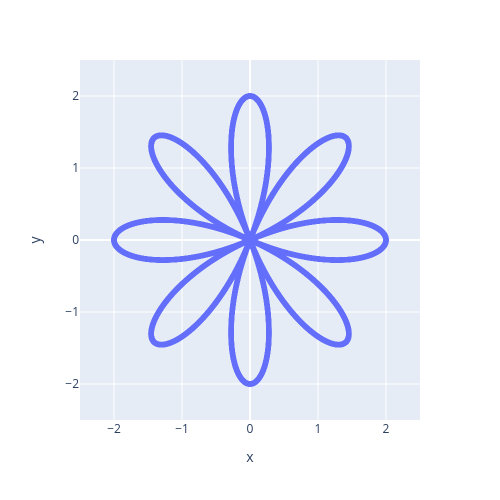

In [61]:
import plotly.express as px
import numpy as np

t = np.arange(0, 1001, 0.2)
k = 4
r = 2
w = 50 / np.pi
x = r * np.cos(k * w * t) * np.cos(w * t)
y = r * np.cos(k * w * t) * np.sin(w * t)

fig = px.scatter(x=x , y=y)
fig.update_xaxes(range = [-2.5, 2.5])
fig.update_yaxes(range = [-2.5, 2.5])
fig.show(width = 500, height = 500, renderer='png')

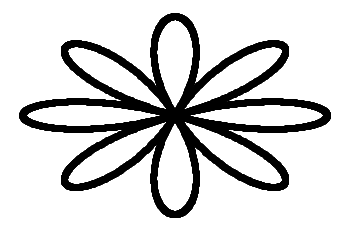

In [70]:
import matplotlib.pyplot as plt

plt.scatter(x, y, c='black')
plt.axis('off')
plt.savefig('catkin_ws/src/path_following/worlds/param_curve.png')
plt.show()

In [72]:
def path_gen(k, r, w, step):
    t = 0
    while True:
        x = r * np.cos(k * w * t) * np.cos(w * t)
        y = r * np.cos(k * w * t) * np.sin(w * t)
        yield (x, y)
        t = t + step
    

In [73]:
k = 4
r = 2
w = 50 / np.pi
step = 0.2
path = path_gen(k, r, w, step)

In [88]:
1/20 

6.285

In [89]:
np.deg2rad(1)

0.017453292519943295

# Wavefront

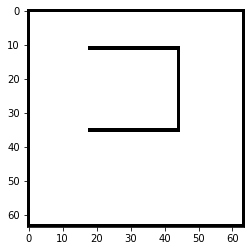

In [102]:
import plotly.express as px
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('./catkin_ws/src/wavefront/worlds/maze.png')
plt.imshow(img)
plt.show()

In [143]:
print(img.shape)
height, width = (16, 16) # in meters
scale = 28 # meters / pixel
img_big = cv2.resize(img, (width * scale, height * scale), interpolation = cv2.INTER_AREA)
img_big.shape

#(img/255).astype(np.int64)

(64, 64, 3)


(448, 448, 3)

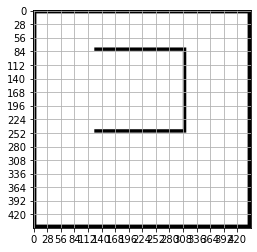

In [163]:
plt.imshow(img_big)
plt.xticks(np.arange(0, 448, 28))
plt.yticks(np.arange(0, 448, 28))
plt.grid()
plt.show()

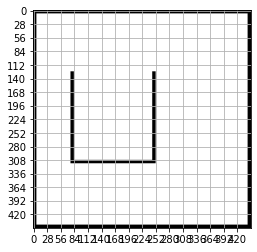

In [165]:
plt.imshow(grid*255)
plt.xticks(np.arange(0, 448, 28))
plt.yticks(np.arange(0, 448, 28))
plt.grid()
plt.show()

In [175]:
gray = cv2.cvtColor(img_big, cv2.COLOR_BGR2GRAY)
grid = cv2.transpose(gray.copy()) # X x Y x RGB
grid = (grid/255).astype(np.uint64)
grid = 0**grid

In [190]:
robot_size = (0.5, 0.5)
goal = (5, 2)
initial = (-6, 2)

In [168]:
grid.shape

(448, 448)

In [189]:
0.5 * 28

14.0

In [198]:
x

array([ 2.        , -1.97080018,  1.88424145, ...,  0.91598351,
       -0.61533556,  0.3046498 ])

In [287]:
# increase obstacle width with robot shape
augmented_grid = grid.copy()
rx, ry = robot_size
rx = 28*rx
ry = 28*ry
xmax, ymax = grid.shape
for pixel in list(zip(*np.nonzero(grid == 1))):
    x, y = pixel
    augmented_grid[int(np.maximum(0, x - rx//2)) : int(np.minimum(xmax-1, x + rx//2)), 
                   int(np.maximum(0, y - ry//2)) : int(np.minimum(ymax-1, y + ry//2))] = 1

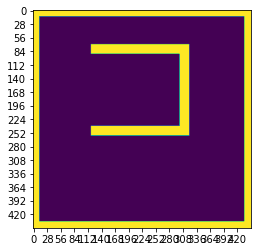

In [288]:
plt.imshow(cv2.transpose(augmented_grid), cmap='viridis')
plt.xticks(np.arange(0, 448, 28))
plt.yticks(np.arange(0, 448, 28))
#plt.grid()
plt.show()

In [8]:
#augmented_grid = np.load('./catkin_ws/src/wavefront/worlds/grid1.npy')
height, width = (16, 16) # in meters
scale = 28 # meters / pixel
robot_size = (0.5, 0.5)
goal = (5, 2)
initial = (-6, 2)

In [46]:
# Wavefront alg
#augmented_grid[scale * (goal[0] + width//2), scale * (-goal[1] + height//2)] = 2

def infinite_range(t0):
    num = t0
    while True:
        yield num
        num += 1

def meters2pixels(coord):
    xm, ym = coord
    xp = int(np.round(scale * (xm + width//2)))
    yp = int(np.round(scale * (-ym + height//2)))
    coor_pixels = (xp, yp)
    
    return coor_pixels

def wavefront(grid, neighbor=4):
    augmented_grid = grid.copy()
    interrupt = 0
    init_xp, init_yp = meters2pixels(initial)
    xmax, ymax = grid.shape

    for i in infinite_range(2):
        for pixel in zip(*np.nonzero(augmented_grid == i)):
            x, y = pixel
            if neighbor == 4:
                # 4 neighbors
                sub_gridx = augmented_grid[np.maximum(0, x - 1) : np.minimum(xmax, x + 2), y]
                sub_gridy = augmented_grid[x, np.maximum(0, y - 1) : np.minimum(ymax, y + 2)]
                sub_gridx[sub_gridx == 0] = i+1
                sub_gridy[sub_gridy == 0] = i+1
                if (x - 1 <= init_xp <= x + 1 and init_yp == y) or (y - 1 <= init_yp <= y + 1 and init_xp == x):
                    interrupt = 1
            else:
                # 8 neighbors
                sub_grid = augmented_grid[np.maximum(0, x - 1) : np.minimum(xmax, x + 2),
                                          np.maximum(0, y - 1) : np.minimum(ymax, y + 2)]
                sub_grid[sub_grid == 0] = i+1

                if x - 1 <= init_xp <= x + 1 and y - 1 <= init_yp <= y + 1:
                    interrupt = 1
                #if y - 1 <= init_yp <= y + 1:
                #    interrupt = 1
        if interrupt:
            print(i)
            break
        if not (grid == 0).any() and not interrupt:
            print("ERO")
            break
    return augmented_grid

In [41]:
t = wavefront(augmented_grid, 4)

In [49]:
import numpy as np
#scale * (initial[0] + width//2)
aux = [1, 1]
if 1<= aux[0] <= 3 and 0 <= aux[1] <= 2:
    print('NICE')


NICE


In [151]:
# 4 neighbors
test = augmented_grid.copy()
test2x = test[364-1 : 364+2, 168]
test2y = test[364, 168-1 : 168+2]
test2x[test2x==0] = 3
test2y[test2y==0] = 3
test[364-2 : 364+3, 168-2 : 168+3]

array([[0, 0, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 3, 2, 3, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 0, 0]], dtype=uint64)

In [152]:
# 8 neighbors
test3 = augmented_grid.copy()
test4 = test3[364-1 : 364+2, 168-1 : 168+2]
test4[test4==0] = 3
print(test4)
test3[364-2 : 364+3, 168-2 : 168+3]

[[3 3 3]
 [3 2 3]
 [3 3 3]]


array([[0, 0, 0, 0, 0],
       [0, 3, 3, 3, 0],
       [0, 3, 2, 3, 0],
       [0, 3, 3, 3, 0],
       [0, 0, 0, 0, 0]], dtype=uint64)

In [173]:
(np.array([test2x, test2y]) == 3).any()

True

In [161]:
kkk = 2
if kkk:
    print('foi')

foi


In [50]:
def pixels2meters(coord):
    """Converts pixels coordinate to coordinate in meters.
    """
    xp, yp = coord
    xm = xp / scale - width // 2
    ym = -yp / scale + height // 2
    coord_meters = (xm, ym)
    
    return coord_meters
xp, yp = meters2pixels((-4.4, 3.8))
print(xp, yp)
xm, ym = pixels2meters((xp, yp))
print(xm, ym)

101 118
-4.392857142857142 3.7857142857142856


In [100]:
subt = t[364-1 : 364+2, 168-1 : 168+2]
print(subt)
print(np.nonzero(subt == 4))
a = list(zip(*np.nonzero(subt == 4)))
print(a)
for i in a:
    x, y = i
    print(x + 364-1, y + 168-1)

[[4 3 4]
 [3 2 3]
 [4 3 4]]
(array([0, 0, 2, 2]), array([0, 2, 0, 2]))
[(0, 0), (0, 2), (2, 0), (2, 2)]
363 167
363 169
365 167
365 169


In [150]:
(subt==3).any() or (subt==4).any()

True

In [115]:
pixels2meters(tuple(np.argwhere(subt == 3)[0] + [364 - 1, 168 - 1]))

(4.9642857142857135, 2.0)

In [290]:
np.save('./catkin_ws/src/wavefront/worlds/grid1.npy', augmented_grid)

In [25]:
import numpy as np
t = np.load('./catkin_ws/src/wavefront/worlds/grid1.npy')

In [47]:
goal = (5, 2)
w = t.copy()
goal_xp, goal_yp = meters2pixels(goal)
w[goal_xp, goal_yp] = 2
w = wavefront(w)

489


In [27]:
w[433-1 : 433+2, 168-1 : 168+2]

array([[71, 70, 71],
       [72, 71, 72],
       [ 1,  1,  1]], dtype=uint64)

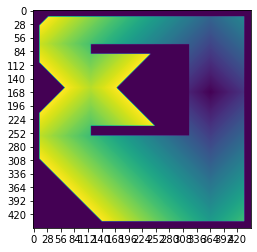

In [54]:
import matplotlib.pyplot as plt
import cv2
plt.imshow(cv2.transpose(w), cmap='viridis')
plt.xticks(np.arange(0, 448, 28))
plt.yticks(np.arange(0, 448, 28))
#plt.grid()
plt.show()

In [51]:
pos_x, pos_y = (-6, 2)
def path2goal(wave_grid):
    xmax, ymax = wave_grid.shape
    robot_xp, robot_yp = meters2pixels((pos_x, pos_y))
    robot_weight = wave_grid[robot_xp, robot_yp]
    sub_grid = wave_grid[np.maximum(0, robot_xp - 1) : np.minimum(xmax, robot_xp + 2),
                         np.maximum(0, robot_yp - 1) : np.minimum(ymax, robot_yp + 2)]
    idxs = np.argwhere(sub_grid == robot_weight - 1)
    
    if idxs.size > 0:
        pixel2follow = tuple(idxs[0] + [np.maximum(0, robot_xp - 1), 
                                        np.maximum(0, robot_yp - 1)])
        coord2follow = pixels2meters(pixel2follow)
    else:
        coord2follow = (pos_x, pos_y)
        print("ruim", robot_xp, robot_yp)

    return coord2follow

In [52]:
path2goal(w)

(-6.0, 1.9642857142857144)

In [55]:
w[56-1 : 56+2, 168-1 : 168+2]

array([[  0,   0, 490],
       [  0, 490, 489],
       [490, 489, 488]], dtype=uint64)

In [58]:
import plotly.express as px
fig = px.imshow(w)
fig.show()

In [3]:
def test():
    a = (1, 2)
    b = (4, 5)
    return (a, b)

In [9]:
f, e = test()
f, e

((1, 2), (4, 5))

# Potential Functions

In [1]:
import numpy as np
a = np.array([1, 2])
b = np.array([[0,0], [1, 2], [3, 4], [2, 4], [5, 6]])
c = np.linalg.norm(a - b, axis=1)
print(c, c[1])

np.argmin(c)

[2.23606798 0.         2.82842712 2.23606798 5.65685425] 0.0


1

In [7]:
test = np.zeros((b.shape[0], 3))
coord = np.array([1, 2])
test[0, :] = np.r_[coord, 3]
test

array([[1., 2., 3.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [11]:
q_oit = np.array([[-7.75999999,  2.00000015,  3.14159257],
 [-7.76,        1.98463019, -3.13286003],
 [-7.75999998,  1.96925789, -3.12412732],
 [-7.76000352,  1.17864723, -2.70495719]])

In [20]:
pos = np.array([-6, 2, 0])
d_t = pos - q_oit
print(d_t)
d_c = np.linalg.norm(d_t, axis=1)
print(d_c)
idx = np.argmin(d_c)
print(idx)
d_qob = d_c[idx]
print(d_qob)
c = q_oit[idx, :]
print(c)
(pos - c)

[[ 1.75999999e+00 -1.50000000e-07 -3.14159257e+00]
 [ 1.76000000e+00  1.53698100e-02  3.13286003e+00]
 [ 1.75999998e+00  3.07421100e-02  3.12412732e+00]
 [ 1.76000352e+00  8.21352770e-01  2.70495719e+00]]
[3.60100039 3.59341734 3.58590526 3.33001894]
3
3.3300189433292657
[-7.76000352  1.17864723 -2.70495719]


array([1.76000352, 0.82135277, 2.70495719])

In [22]:
t = np.array([ 1.18571034e-03,  2.14356359e-04, -6.96123114e+00])
np.linalg.norm(t)

6.961231244281672

In [11]:
np.c_[np.ones(x.shape), x].shape

(1000, 2)

In [22]:
np.c_[x, y].shape

(1000, 2)

In [25]:
np.c_[coords[:, 0], yt].shape

(1000, 2)

In [30]:
import numpy as np
a = np.array([[1, 1], [1, 2], [3, 4], [5, 5], [6, 7], [2, 2]])
b = np.array([[10, 2], [9, 3], [5, 6], [3, 1], [10, 4], [2, 2]])
c = np.array([[1, 1], [9, 2], [3, 4], [5, 5], [15, 40], [20, 20]])

print(np.linalg.norm(a - b[:, None, :], axis=2))
print(np.sum(np.min(np.linalg.norm(a - b[:, None, :], axis=2), axis=1)))
print(np.sum(np.min(np.linalg.norm(a - c[:, None, :], axis=2), axis=1)))
#a - b[:, None, :]

[[9.05538514 9.         7.28010989 5.83095189 6.40312424 8.        ]
 [8.24621125 8.06225775 6.08276253 4.47213595 5.         7.07106781]
 [6.40312424 5.65685425 2.82842712 1.         1.41421356 5.        ]
 [2.         2.23606798 3.         4.47213595 6.70820393 1.41421356]
 [9.48683298 9.21954446 7.         5.09901951 5.         8.24621125]
 [1.41421356 1.         2.23606798 4.24264069 6.40312424 0.        ]]
17.717301412217978
58.31023592751694


In [77]:
import numpy as np
a = np.linspace(0, 10, 10)
b = np.linspace(10, 20, 10)
c = np.c_[a,b]
c

array([[ 0.        , 10.        ],
       [ 1.11111111, 11.11111111],
       [ 2.22222222, 12.22222222],
       [ 3.33333333, 13.33333333],
       [ 4.44444444, 14.44444444],
       [ 5.55555556, 15.55555556],
       [ 6.66666667, 16.66666667],
       [ 7.77777778, 17.77777778],
       [ 8.88888889, 18.88888889],
       [10.        , 20.        ]])

In [147]:
p1 = np.array([-0.6369692,   0.77088925]) 
p2 = np.array([-0.66244595,  0.74910971])
ang0 = (np.arctan2(p1[1], p1[0]))
ang2 = (np.arctan2(p2[1], p2[0]))
s0, s2 = np.sign(np.cos([ang0, ang2]))
c0, c2 = np.sign(np.sin([ang0, ang2]))

print(s0, s2, c0, c2)

-1.0 -1.0 1.0 1.0


In [123]:
test = []
for i in range(1, 20, 2):
    print('test:', test)
    val = (-1)**(i%5)*i
    print('val old', val)
    if test:
        a = test.pop()
        print('a: ', a)
        if np.sign(a) != np.sign(val):
            print('diff:', a, val)
            val = -val
    test.append(val)
test

test: []
val old -1
test: [-1]
val old -3
a:  -1
test: [-3]
val old 5
a:  -3
diff: -3 5
test: [-5]
val old 7
a:  -5
diff: -5 7
test: [-7]
val old 9
a:  -7
diff: -7 9
test: [-9]
val old -11
a:  -9
test: [-11]
val old -13
a:  -11
test: [-13]
val old 15
a:  -13
diff: -13 15
test: [-15]
val old 17
a:  -15
diff: -15 17
test: [-17]
val old 19
a:  -17
diff: -17 19


[-19]

In [119]:
tt = np.array(list(range(1, 20, 2)))
(-1)**(tt%5)

array([-1, -1,  1,  1,  1, -1, -1,  1,  1,  1])

In [51]:
pt

array([[-2838.63954211,   147.58735616],
       [-2838.05866648,   147.58735616],
       [-2837.47779084,   147.58735616],
       ...,
       [ 2968.37418626,   147.58735616],
       [ 2968.9550619 ,   147.58735616],
       [ 2969.53593754,   147.58735616]])